# **Import libraries**

In [1]:
import pandas as pd


**Load dataset**

In [2]:
df=pd.read_csv('/content/data_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Data Preparation**

In [3]:
X = df.drop("charges", axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [4]:
y = df["charges"]
y


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


**Data Splitting**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [6]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast
575,58,female,27.170,0,no,northwest
535,38,male,28.025,1,no,northeast
543,54,female,47.410,0,yes,southeast


**Preprocess categorical variables**

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical = ["sex", "smoker", "region"]
numeric = ["age", "bmi", "children"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical),
        ("num", "passthrough", numeric)
    ]
)
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker', 'region']),
                                ('num', 'passthrough',
                                 ['age', 'bmi', 'children'])])

**Build PIPELINE with linear regression**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', 'passthrough',
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LinearRegression())])

**Model building**
*linear regression*

**TRAIN**

In [9]:
from sklearn.linear_model import LinearRegression
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', 'passthrough',
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LinearRegression())])

**Prediction**

In [10]:
y_test_pred = model.predict(X_test)
y_test_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [11]:
y_train_pred = model.predict(X_train)
y_train_pred

array([ 7094.54007011,  8344.72998713,  9153.77419778, ...,
       11441.08519155, 37314.37460682, 11453.12102783])

**Evaluation model performance**

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Training Performance ===")
print(f"R²     : {train_r2:.4f}")
print(f"MSE    : {train_mse:,.2f}")
print(f"RMSE   : {train_rmse:,.2f}")
print(f"MAE    : {train_mae:,.2f}")

print("\n=== Testing Performance ===")
print(f"R²     : {test_r2:.4f}")
print(f"MSE    : {test_mse:,.2f}")
print(f"RMSE   : {test_rmse:,.2f}")
print(f"MAE    : {test_mae:,.2f}")



=== Training Performance ===
R²     : 0.7417
MSE    : 37,277,681.70
RMSE   : 6,105.55
MAE    : 4,208.23

=== Testing Performance ===
R²     : 0.7836
MSE    : 33,596,915.85
RMSE   : 5,796.28
MAE    : 4,181.19


**coefficients**

In [13]:
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
coeffs = model.named_steps["regressor"].coef_
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coeffs})
print(coef_df.sort_values("coefficient", key=abs, ascending=False))


                 feature   coefficient
1        cat__smoker_yes  23651.128856
4  cat__region_southwest   -809.799354
3  cat__region_southeast   -657.864297
7          num__children    425.278784
2  cat__region_northwest   -370.677326
6               num__bmi    337.092552
5               num__age    256.975706
0          cat__sex_male    -18.591692


**Data visualization of predicted values**

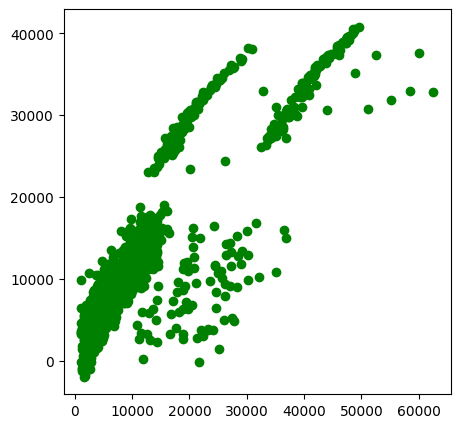

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_train_pred,c='green')
